# Walmart sales
<img src="https://thefashioneaste.files.wordpress.com/2013/09/ryan-gosling-drive-denim-jacket.png">

# Продажи в Walmart 🛒

## Какие задачи решены?

😱 Выполнил все поставленные задачи 😱

## Установим нужные пакеты

In [171]:
import math
import random
from itertools import product

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y
from sklearn.feature_selection import RFECV

%precision %.4f

import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (20, 10)})

# Подготовим данные и помедитируем над ними

## Качаем данные

Скачиваем [данные о продажах в разных магазинах Walmart](https://www.kaggle.com/datasets/yasserh/walmart-dataset), собираемые еженедельно с 5 февраля 2010 по 1 ноября 2012.

**Описание признаков**

* `Store` — условный номер магазина
* `Date` — дата сбора данных
* `Weekly_Sales` — продажи за неделю
* `Holiday_Flag` — праздничная ли неделя 
* `Temperature` — средняя (?) температура за неделю продажи
* `Fuel_Price` — стоимость топлива в регионе с магазином
* `CPI` — индекс потребительских цен
* `Unemployment` — уровень безработицы

**Задача**

Напомним, что ставим задачу **регрессии** — будем предсказывать признак `Weekly_Sales`. 

In [172]:
df_dirty = pd.read_csv('Walmart.csv')
df_dirty

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## Выделим призанки даты

Разобьем дату на несколько столбцов с тем предположением, что, возможно, номер недели относительно месяца, а также сам месяц будут влиять на количество продаж

In [173]:
df = df_dirty.copy()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Week'] = df['Date'].apply(lambda d: (d.day - 1) // 7 + 1)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop(columns=['Date'], inplace=True)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,1,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,3,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,1,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,1,10,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2,10,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,3,10,2012


## Общая информация

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Week          6435 non-null   int64  
 8   Month         6435 non-null   int64  
 9   Year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


Пропущенных значений нет 

In [175]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2.692308,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.264073,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,3.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,5.000000,12.000000,2012.000000


Отдельно хочется сказать, что у `Weekly_Sales` максимум почти в 4 раза больше, чем среднее значение и медиана, нужно будет аккуратнее посмотреть на выбросы

## Распределения значений признаков

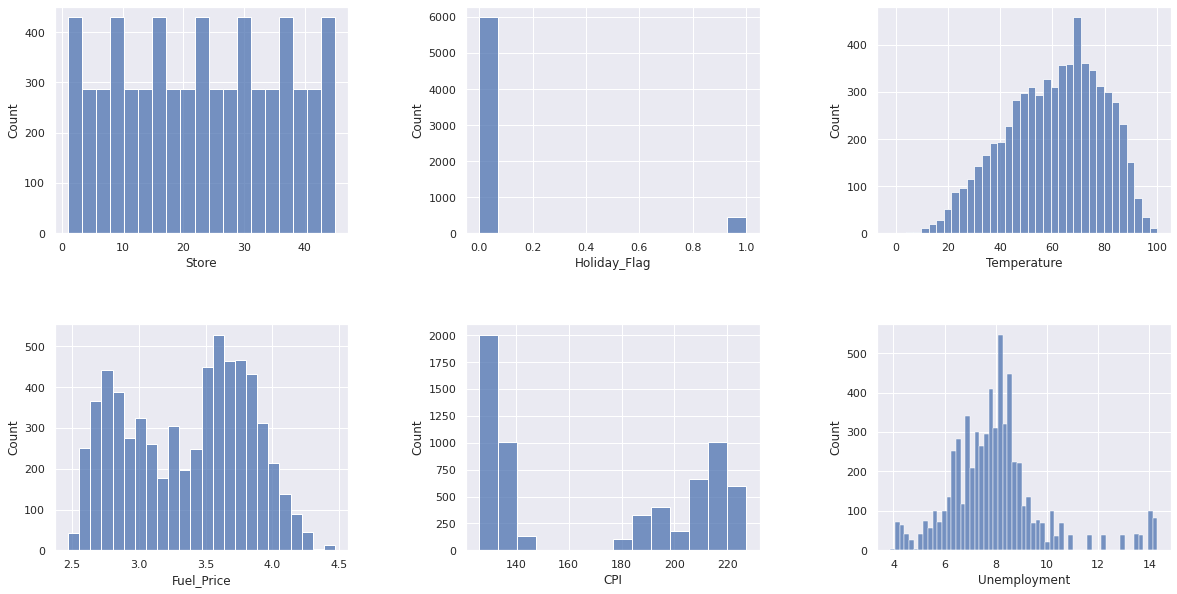

In [176]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sns.histplot(df, x='Store', ax=fig.add_subplot(2, 3, 1))
sns.histplot(df, x='Holiday_Flag', ax=fig.add_subplot(2, 3, 2))
sns.histplot(df, x='Temperature', ax=fig.add_subplot(2, 3, 3))
sns.histplot(df, x='Fuel_Price', ax=fig.add_subplot(2, 3, 4))
sns.histplot(df, x='CPI', ax=fig.add_subplot(2, 3, 5))
sns.histplot(df, x='Unemployment', ax=fig.add_subplot(2, 3, 6))
plt.show()

* В целом, выбросов нет
* Интересно, как CPI разбивается на пару участков
* Также интересно, что у магазинов есть два уровня сбора данных, с одних собирали меньше, с других больше, причем номер магазина это показывает. Может быть, собирались данные с крупного магазина в регионе / с более мелких магазинов, и так для каждого региона ¯\\_(ツ)\_/¯

### О Weekly Sales

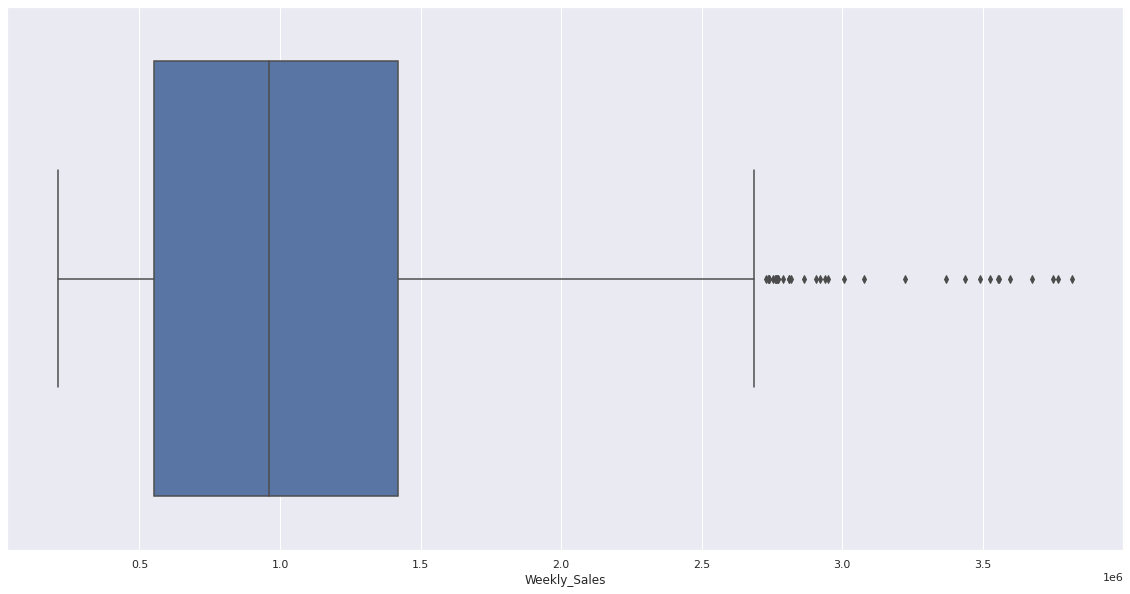

In [177]:
sns.boxplot(df, x='Weekly_Sales', hue='Holiday_Flag');

* Кажется, что выбросы есть 🤔
* Посмотрим на них внимательнее

In [178]:
df[(df['Weekly_Sales'] > 2.5e6)]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
185,2,2658725.29,1,62.98,2.735,211.406287,8.163,4,11,2010
188,2,2609166.75,0,47.55,2.869,211.064546,8.163,3,12,2010
189,2,3436007.68,0,49.97,2.886,211.064660,8.163,4,12,2010
237,2,2614202.30,1,56.36,3.236,218.113027,7.441,4,11,2011
241,2,3224369.80,0,46.66,3.112,218.999550,7.441,4,12,2011
471,4,2789469.45,1,48.08,2.752,126.669267,7.127,4,11,2010
474,4,2740057.14,0,46.57,2.884,126.879484,7.127,3,12,2010
475,4,3526713.39,0,43.21,2.887,126.983581,7.127,4,12,2010
523,4,3004702.33,1,47.96,3.225,129.836400,5.143,4,11,2011
525,4,2508955.24,0,31.64,3.153,129.855533,5.143,2,12,2011


В целом ожидаемо, почти все -- конец декабря, ноября (Новый Год, Рождество, День Благодарения, черная пятница), проверим это точнее

In [179]:
df[(df['Weekly_Sales'] > 2.5e6) & (df['Month'] == 12)]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
188,2,2609166.75,0,47.55,2.869,211.064546,8.163,3,12,2010
189,2,3436007.68,0,49.97,2.886,211.064660,8.163,4,12,2010
241,2,3224369.80,0,46.66,3.112,218.999550,7.441,4,12,2011
474,4,2740057.14,0,46.57,2.884,126.879484,7.127,3,12,2010
475,4,3526713.39,0,43.21,2.887,126.983581,7.127,4,12,2010
525,4,2508955.24,0,31.64,3.153,129.855533,5.143,2,12,2011
526,4,2771397.17,0,36.44,3.149,129.898065,5.143,3,12,2011
527,4,3676388.98,0,35.92,3.103,129.984548,5.143,4,12,2011
761,6,2727575.18,0,55.07,2.886,212.916508,7.007,4,12,2010
813,6,2644633.02,0,49.45,3.112,220.947724,6.551,4,12,2011


`Holiday_Flag` равен 0??? Как-то странно...

In [180]:
df[(df['Weekly_Sales'] > 2.5e6) & (df['Month'] == 11)]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
185,2,2658725.29,1,62.98,2.735,211.406287,8.163,4,11,2010
237,2,2614202.30,1,56.36,3.236,218.113027,7.441,4,11,2011
471,4,2789469.45,1,48.08,2.752,126.669267,7.127,4,11,2010
523,4,3004702.33,1,47.96,3.225,129.836400,5.143,4,11,2011
1329,10,2939946.38,1,55.33,3.162,126.669267,9.003,4,11,2010
1381,10,2950198.64,1,60.68,3.760,129.836400,7.874,4,11,2011
1758,13,2766400.05,1,28.22,2.830,126.669267,7.795,4,11,2010
1810,13,2864170.61,1,38.89,3.445,129.836400,6.392,4,11,2011
1901,14,2921709.71,1,46.15,3.039,182.783277,8.724,4,11,2010
1953,14,2685351.81,1,48.71,3.492,188.350400,8.523,4,11,2011


* Ну, здесь, видимо, из-за Дня Благодарения поставлена 1 в `Holiday_Flag` 
* Да, действительно, конец ноября, декабрь влияет на эти выбросы. Предполагаю, что модель сможет это учесть, поэтому не будем считать это выбросами

## Сравнение признаков 

Преобразуем сначала некоторые признаки в категориальный тип

In [181]:
df = df.astype({
    'Store': 'object',
    'Holiday_Flag': 'object',
    'Week': 'object',
    'Month': 'object',
    'Year': 'object',
})
df.dtypes

Store object
Weekly_Sales float64
Holiday_Flag object
Temperature float64
Fuel_Price float64
CPI float64
Unemployment float64
Week object
Month object
Year object
dtype: object

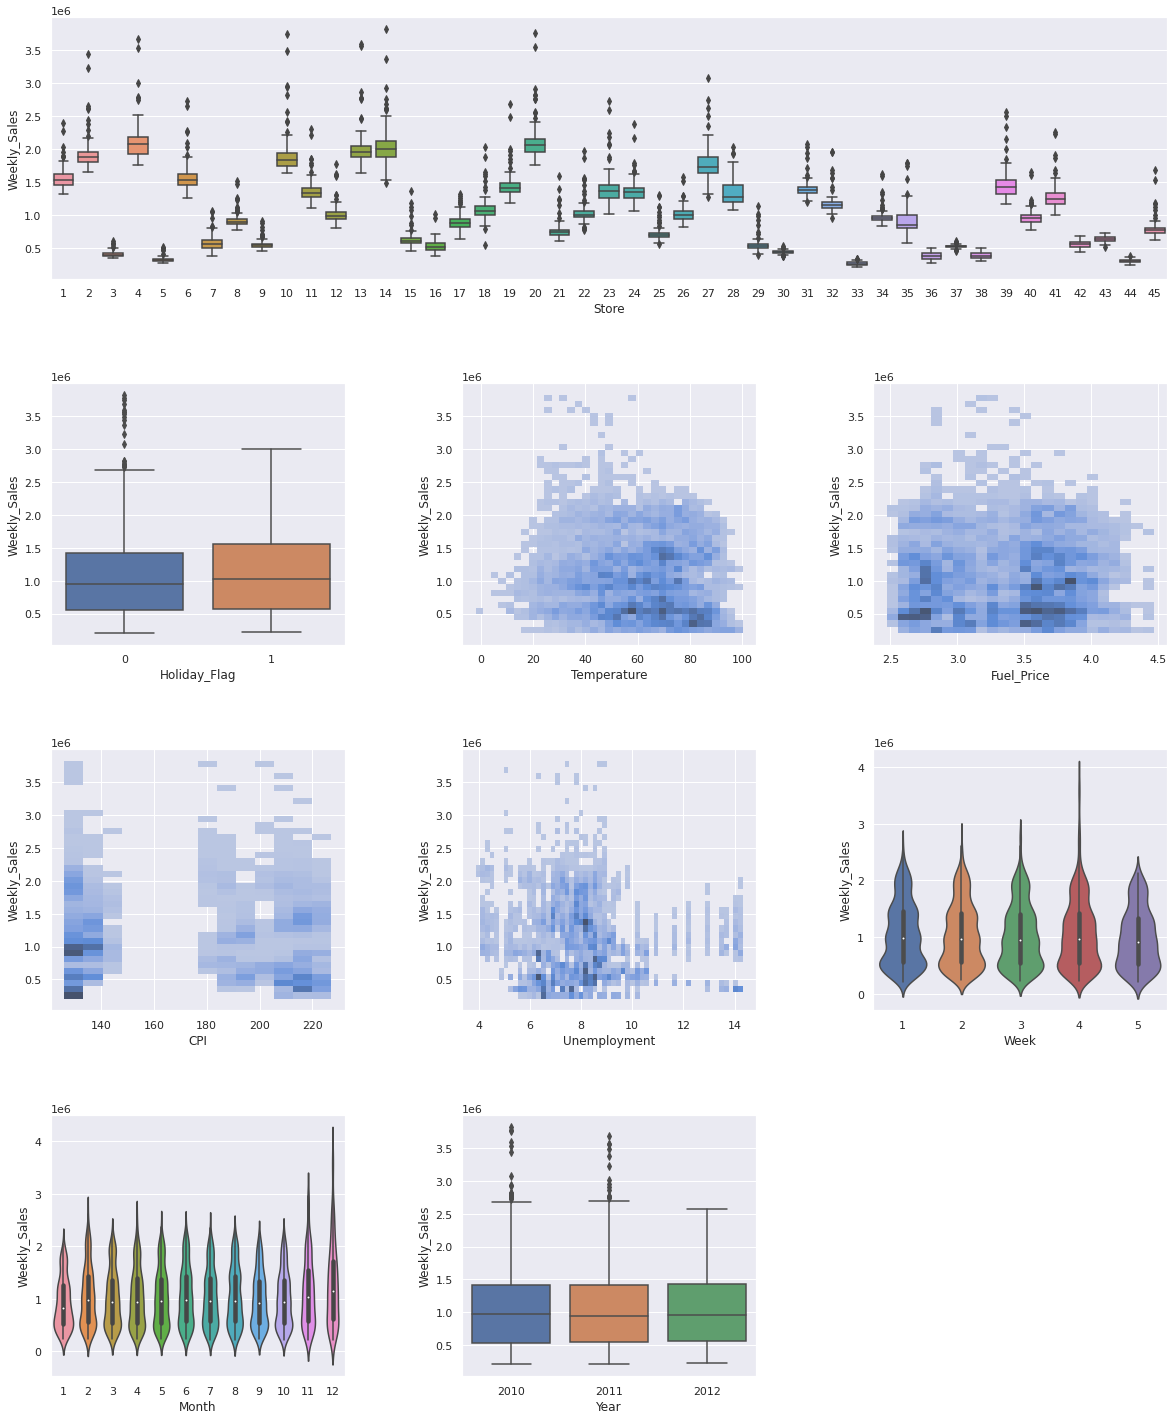

In [182]:
fig = plt.figure(figsize=(20, 25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sns.boxplot(df, x='Store', y='Weekly_Sales', ax=fig.add_subplot(4, 3, (1, 3)))
sns.boxplot(df, x='Holiday_Flag', y='Weekly_Sales', ax=fig.add_subplot(4, 3, 4))
sns.histplot(df, x='Temperature', y='Weekly_Sales',
             ax=fig.add_subplot(4, 3, 5))  # Может быть зависимость будет включена в дни?
sns.histplot(df, x='Fuel_Price', y='Weekly_Sales', ax=fig.add_subplot(4, 3, 6))  # ???
sns.histplot(df, x='CPI', y='Weekly_Sales', ax=fig.add_subplot(4, 3, 7))
sns.histplot(df, x='Unemployment', y='Weekly_Sales', ax=fig.add_subplot(4, 3, 8))
sns.violinplot(df, x='Week', y='Weekly_Sales', ax=fig.add_subplot(4, 3, 9))
sns.violinplot(df, x='Month', y='Weekly_Sales', ax=fig.add_subplot(4, 3, 10))
sns.boxplot(df, x='Year', y='Weekly_Sales', ax=fig.add_subplot(4, 3, 11))
plt.show()

* Ну, линейные зависимости не так видны в большинстве случаев... Посмотрим еще на это, когда будем выбирать наиболее влиятельные признаки
* `Weekly_sales` довольно высоки при `Holiday_flag` == 0, потому что под Новый Год и Рождество флаг равен 0...
* Предполагаю, что основную роль будет играть номер магазина :)

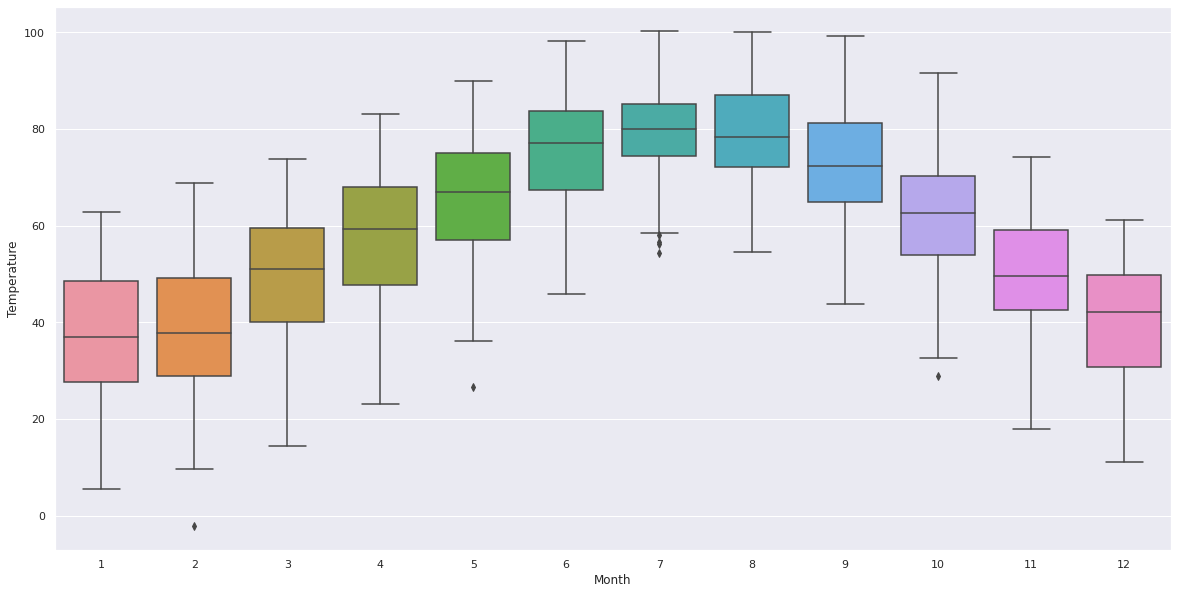

In [183]:
sns.boxplot(df, x='Month', y='Temperature');

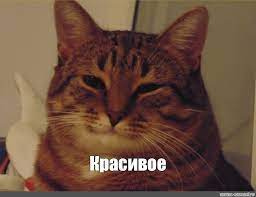

[✔️] Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин тут (целевой признак для предсказания --- price).

[✔️] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

[✔️] Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.

[✔️] При необходимости выполнить полезные преобразования данных (например, трансформировать категориальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

# Предсказываем 🔮

## Реализуем свой gradient_descent

In [184]:
def gradient_descent(
        X_sample,
        y_sample,
        alpha=0.01,
        get_gradient_coeff=lambda index: 1 / index ** 0.5,
        norm_difference=1e-6,
        solver='batch',
        batch_size=100,
        max_iteration_count=15000,
        seed=666,
):
    """Gradient Descent Linear Regression Solver
    
    :param X_sample: features for prediction, ndarray
    :param y_sample: target feature
    :param alpha: regularization factor, 
    :param norm_difference: min differnece between w_k and w_{k-1}
    :param solver: 'batch', 'mini-batch' or 'stoch'
    :param get_gradient_coeff: get gradiend coeff by epoch index
    :param batch_size: batch size :)
    :param max_iteration_count: max iteration count :)
    :param seed: seed for random generation

    :returns: vector of weights, last value --- intercept value
    """

    n = len(X_sample)
    X_with_ones = np.append(
        X_sample,
        np.ones((n, 1)),
        axis=1
    )
    np.random.seed(seed)
    random.seed(seed)
    w_previous = None
    w = np.random.rand(X_with_ones.shape[1])
    n_batches = math.ceil(n / batch_size)

    k = 1
    while w_previous is None or (np.linalg.norm(w - w_previous) > norm_difference and k < max_iteration_count):
        w_previous = w.copy()
        if solver == 'batch':
            w -= 2 * get_gradient_coeff(k) * (
                        -1 / n * (X_with_ones.transpose() @ (y_sample - X_with_ones @ w)) + alpha * w)
        elif solver == 'mini-batch':
            batch_index = (k - 1) % n_batches
            batch_slice = slice(batch_index * batch_size, (batch_size + 1) * batch_size)
            X_batch = X_with_ones[batch_slice]
            y_batch = y_sample[batch_slice]
            w -= 2 * get_gradient_coeff(k) * (-1 / n * (X_batch.transpose() @ (y_batch - X_batch @ w)) + alpha * w)
        else:  # solver == 'stoch'
            random_index = random.randint(0, n - 1)
            X_item = X_with_ones[random_index]
            y_item = y_sample[random_index]
            w -= 2 * get_gradient_coeff(k) * (-(y_item - X_item @ w) * X_item + alpha * w)
        k += 1
    return w


def predict(X_sample, model_weights):
    return np.append(
        X_sample,
        np.ones((len(X_sample), 1)),
        axis=1
    ) @ model_weights

### Посмотрим, работает ли он

In [185]:
X = np.linspace(0.01, 0.98, num=100)
y = 2.3 * X + 0.56
y_noised = y + np.random.normal(0, 0.1, 100)
print('real w: [2.3, 0.56]')
print()

print('---- My model ----')
print(f'Y without noise, alpha = 0: w = {gradient_descent(X.reshape((100, 1)), y, alpha=0)}')
print(f'Y with noise, alpha = 0: w = {gradient_descent(X.reshape((100, 1)), y_noised, alpha=0)}')
print(f'Y with noise, alpha = 0.01: w = {gradient_descent(X.reshape((100, 1)), y_noised, alpha=1e-2)}')
print(f'Y with noise, alpha = 0.001, solver = batch: w = {gradient_descent(X.reshape((100, 1)), y_noised, alpha=1e-3)}')
print(
    f'Y with noise, alpha = 0.001, solver = mini-batch: w = {gradient_descent(X.reshape((100, 1)), y_noised, alpha=1e-3, solver="mini-batch")}')
print(
    f'Y with noise, alpha = 0.001, solver = stoch: w = {gradient_descent(X.reshape((100, 1)), y_noised, alpha=1e-3, solver="stoch")}')

print()
print('---- From Sklearn ----')
clf = Ridge(alpha=1)
clf.fit(X.reshape((100, 1)), y)
print(f'Y with noise, alpha = 1: w = [{clf.coef_[0]}, {clf.intercept_}]')

clf = Ridge(alpha=0.01)
clf.fit(X.reshape((100, 1)), y)
print(f'Y with noise, alpha = 0.01: w = [{clf.coef_[0]}, {clf.intercept_}]')

real w: [2.3, 0.56]

---- My model ----
Y without noise, alpha = 0: w = [2.29976074 0.56012645]
Y with noise, alpha = 0: w = [2.29752153 0.56186958]
Y with noise, alpha = 0.01: w = [2.07874333 0.6635285 ]
Y with noise, alpha = 0.001, solver = batch: w = [2.27266374 0.57360046]
Y with noise, alpha = 0.001, solver = mini-batch: w = [2.27266374 0.57360046]
Y with noise, alpha = 0.001, solver = stoch: w = [2.25868217 0.57752082]

---- From Sklearn ----
Y with noise, alpha = 1: w = [2.044422692167029, 0.6865107673773205]
Y with noise, alpha = 0.01: w = [2.2971283146452377, 0.5614214842506071]


* Все работает)
* Убеждаемся, что от коэффициента регуляризации $\alpha$ может сильно зависеть ответ, подбирать его нужно осторожно 


[✔️] Самостоятельно реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. В качестве функционала можно выбрать, например, функцию ошибок MSE + L2-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.

[✔️] (+1 балл) Также самостоятельно реализовать метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD), обучить модели и добавить их во все сравнения.

[✔️] (+1 балл) Также самостоятельно реализовать метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent), обучить модели и добавить их во все сравнения.

## Обратно к нашим магазинам

### Применим унитарное кодирование категориальных признаков 

In [186]:
df_to_lr = pd.get_dummies(df)
df_to_lr.drop(columns=['Store_1', 'Holiday_Flag_0', 'Week_1', 'Month_1', 'Year_2010'], inplace=True)
df_to_lr

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2011,Year_2012
0,1643690.90,42.31,2.572,211.096358,8.106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,38.51,2.548,211.242170,8.106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,39.93,2.514,211.289143,8.106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,46.63,2.561,211.319643,8.106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,46.50,2.625,211.350143,8.106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,64.88,3.997,192.013558,8.684,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6431,733455.07,64.89,3.985,192.170412,8.667,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6432,734464.36,54.47,4.000,192.327265,8.667,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6433,718125.53,56.47,3.969,192.330854,8.667,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### Разделим данные на тестовую и обучающую выборки

In [187]:
X = df_to_lr.drop(columns=["Weekly_Sales"])
y = df_to_lr["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

### Масштабируем данные

In [188]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Псмотрим на корреляцию признаков

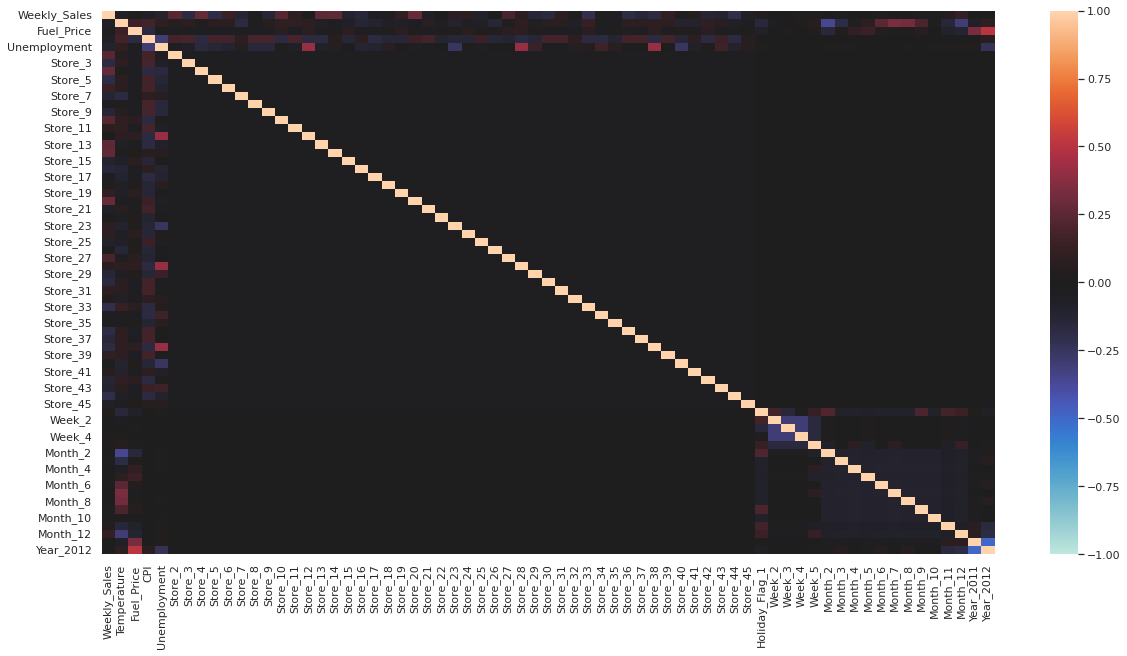

In [189]:
sns.heatmap(df_to_lr.corr(), annot=False, vmin=-1, vmax=1, center=0);

Кажется, что особо сильно корреляции, которая бы ухудшила предсказания модели, нет. Посмотрим на нее после выбора признаков в конце, сейчас оставим так, как есть.

### Обучаем на нашей модели

Реализуем свой подбор гиперпараметров (по MSE)

In [190]:
alphas = np.logspace(-4, 1, 6)
gradient_coeff_functions = (
    {'name': '1/x', 'function': lambda x: x ** -1},
    {'name': '1/sqrt(x)', 'function': lambda x: x ** -0.5}
)
solvers = ('batch', 'mini-batch', 'stoch')

results = []
for alpha, gradient_coeff_function, solver in product(alphas, gradient_coeff_functions, solvers):
    weights = gradient_descent(
        X_train_scaled,
        y_train.to_numpy(),
        alpha=alpha,
        get_gradient_coeff=gradient_coeff_function['function'],
        solver=solver,
        max_iteration_count=1e5 if solver == 'stoch' else 1.5e4,
    )
    y_test_pred = predict(X_test_scaled, weights)
    current_rmse = mean_squared_error(y_test_pred, y_test, squared=False)
    print(f"alpha = {alpha}, gradient_coeff = {gradient_coeff_function['name']}, solver={solver}. RMSE: {current_rmse}")
    results.append(
        (current_rmse, (alpha, gradient_coeff_function, solver))
    )

print()
print('----- Min RMSE -----')
min_rmse, (alpha, gradient_coeff_function, solver) = min(results, key=lambda x: x[0])
print(f'alpha = {alpha}, gradient_coeff = {gradient_coeff_function["name"]}, solver={solver}')
print(f'RMSE: {min_rmse}')

alpha = 0.0001, gradient_coeff = 1/x, solver=batch. RMSE: 128480.42045071474
alpha = 0.0001, gradient_coeff = 1/x, solver=mini-batch. RMSE: 132346.00183855908
alpha = 0.0001, gradient_coeff = 1/x, solver=stoch. RMSE: 1179875251.6847963
alpha = 0.0001, gradient_coeff = 1/sqrt(x), solver=batch. RMSE: 123476.43467603243
alpha = 0.0001, gradient_coeff = 1/sqrt(x), solver=mini-batch. RMSE: 123875.95089621571
alpha = 0.0001, gradient_coeff = 1/sqrt(x), solver=stoch. RMSE: 2.823342725906376e+102
alpha = 0.001, gradient_coeff = 1/x, solver=batch. RMSE: 128517.14783221397
alpha = 0.001, gradient_coeff = 1/x, solver=mini-batch. RMSE: 132330.68818168656
alpha = 0.001, gradient_coeff = 1/x, solver=stoch. RMSE: 1158705166.7712317
alpha = 0.001, gradient_coeff = 1/sqrt(x), solver=batch. RMSE: 123431.99693209703
alpha = 0.001, gradient_coeff = 1/sqrt(x), solver=mini-batch. RMSE: 123813.78864466035
alpha = 0.001, gradient_coeff = 1/sqrt(x), solver=stoch. RMSE: 9.541378807333947e+101
alpha = 0.01, grad

* В целом, логично, что лучшую оценку показал `batch`, он максимально точно ищет направление антиградиента
* Посмотрим на другие оценки лучшей модели

In [191]:
_, (alpha, gradient_coeff_function, solver) = min(results, key=lambda x: x[0])
weights = gradient_descent(
    X_train_scaled,
    y_train.to_numpy(),
    alpha=alpha,
    get_gradient_coeff=gradient_coeff_function['function'],
    solver=solver
)
y_test_pred = predict(X_test_scaled, weights)
print('--- Best model scores ---')
print(f"Model: alpha = {alpha}, gradient_coeff = {gradient_coeff_function['name']}, solver={solver}")
print(f"MSE: {mean_squared_error(y_test_pred, y_test)}")
print(f"RMSE: {mean_squared_error(y_test_pred, y_test, squared=False)}")
print(f"R^2: {r2_score(y_test_pred, y_test)}")

--- Best model scores ---
Model: alpha = 0.001, gradient_coeff = 1/sqrt(x), solver=batch
MSE: 15235457866.645208
RMSE: 123431.99693209703
R^2: 0.9496290815434828


Неплохо)

### Обучаем на модели из Sklearn

Text(0, 0.5, 'CV score')

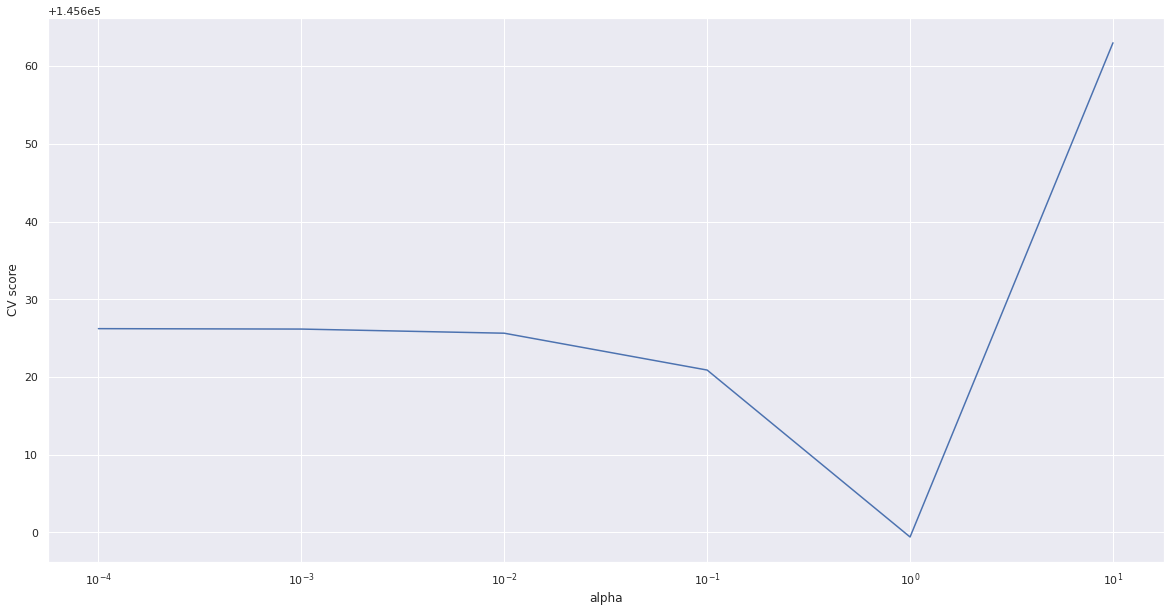

In [192]:
alpha_grid = np.logspace(-4, 1, 6)
searcher = GridSearchCV(
    Ridge(),
    [{"alpha": alpha_grid}],
    scoring="neg_root_mean_squared_error",
    cv=5
)
searcher.fit(X_train_scaled, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [193]:
best_alpha = searcher.best_params_["alpha"]
print(f"Best alpha = {best_alpha:.4f}")

Best alpha = 1.0000


In [194]:
best_sklearn_model = Ridge(alpha=best_alpha)
best_sklearn_model.fit(X_train_scaled, y_train)
y_test_pred = best_sklearn_model.predict(X_test_scaled)

print('--- Best Sklearn model scores ---')
print(f"Model: alpha = {best_alpha}")
print(f"MSE: {mean_squared_error(y_test_pred, y_test)}")
print(f"RMSE: {mean_squared_error(y_test_pred, y_test, squared=False)}")
print(f"R^2: {r2_score(y_test_pred, y_test)}")

--- Best Sklearn model scores ---
Model: alpha = 1.0
MSE: 15247479421.589254
RMSE: 123480.68440687092
R^2: 0.9497056642906754


* Практически идентичные результаты по сравнению с моей реализацией :)
* Правда, параметр регуляризации $\alpha$ получился другой, может это связано с разницей в функциях получения коэффициента $\lambda_k$, стоящего около антиградиента 🤔 

### Используем кросс-валидацию

Ладно, тут уже не будем городить велосипед, сделаем свой `MyRidge` на основе `gradient_descent`

In [195]:
class MyRidge(BaseEstimator):
    def __init__(self, alpha=0.01, solver='batch'):
        self.weights = None
        self.alpha = alpha
        self.solver = solver

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.weights = gradient_descent(X, y, alpha=self.alpha, solver=self.solver)
        return self

    def predict(self, X):
        return predict(X, self.weights)

#### Кросс-валидация для нашей модели

In [196]:
scores = cross_validate(
    MyRidge(alpha=0.001),
    X_train_scaled,
    y_train,
    cv=5,
    scoring=('neg_root_mean_squared_error', 'neg_mean_squared_error', 'r2'),
    return_train_score=True
)

scorings = [
    'train_neg_mean_squared_error',
    'test_neg_mean_squared_error',
    'train_neg_root_mean_squared_error',
    'test_neg_root_mean_squared_error',
    'train_r2',
    'test_r2',
]

cv_data = {
    f'Fold{fold_index + 1}': [scores[scoring][fold_index] for scoring in scorings] 
    for fold_index in range(5)
}
cv_data['E'] = [np.mean(scores[scoring]) for scoring in scorings]
cv_data['STD'] = [np.std(scores[scoring]) for scoring in scorings]
pd.DataFrame(data=cv_data, index=['neg-mse-train', 'neg-mse-test', 'neg-rmse-train', 'neg-rmse-test', 'r2-train', 'r2-test'])

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
neg-mse-train,-2.048306e+10,-2.043978e+10,-1.985995e+10,-2.073996e+10,-2.177578e+10,-2.065971e+10,6.278905e+08
neg-mse-test,-2.188981e+10,-2.213749e+10,-2.473515e+10,-2.091987e+10,-1.671495e+10,-2.127945e+10,2.608241e+09
neg-rmse-train,-1.431191e+05,-1.429678e+05,-1.409254e+05,-1.440138e+05,-1.475662e+05,-1.437184e+05,2.173315e+03
neg-rmse-test,-1.479520e+05,-1.487867e+05,-1.572741e+05,-1.446370e+05,-1.292863e+05,-1.455873e+05,9.154623e+03
r2-train,9.362100e-01,9.368495e-01,9.377100e-01,9.359465e-01,9.330351e-01,9.359502e-01,1.579304e-03
r2-test,9.332214e-01,9.303718e-01,9.266636e-01,9.340988e-01,9.463514e-01,9.341414e-01,6.634154e-03


#### Кросс-валидация для sklearn модели

In [197]:
scores = cross_validate(
    Ridge(alpha=1),
    X_train_scaled,
    y_train,
    cv=5,
    scoring=('neg_root_mean_squared_error', 'neg_mean_squared_error', 'r2'),
    return_train_score=True
)

scorings = [
    'train_neg_mean_squared_error',
    'test_neg_mean_squared_error',
    'train_neg_root_mean_squared_error',
    'test_neg_root_mean_squared_error',
    'train_r2',
    'test_r2',
]

cv_data = {
    f'Fold{fold_index + 1}': [scores[scoring][fold_index] for scoring in scorings] 
    for fold_index in range(5)
}
cv_data['E'] = [np.mean(scores[scoring]) for scoring in scorings]
cv_data['STD'] = [np.std(scores[scoring]) for scoring in scorings]
pd.DataFrame(data=cv_data, index=['neg-mse-train', 'neg-mse-test', 'neg-rmse-train', 'neg-rmse-test', 'r2-train', 'r2-test'])

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
neg-mse-train,-2.047299e+10,-2.043155e+10,-1.985118e+10,-2.073401e+10,-2.177015e+10,-2.065198e+10,6.291164e+08
neg-mse-test,-2.191701e+10,-2.215735e+10,-2.469824e+10,-2.092298e+10,-1.671724e+10,-2.128257e+10,2.600238e+09
neg-rmse-train,-1.430839e+05,-1.429390e+05,-1.408942e+05,-1.439931e+05,-1.475471e+05,-1.436915e+05,2.177934e+03
neg-rmse-test,-1.480440e+05,-1.488535e+05,-1.571568e+05,-1.446478e+05,-1.292951e+05,-1.455994e+05,9.130951e+03
r2-train,9.362414e-01,9.368750e-01,9.377375e-01,9.359648e-01,9.330524e-01,9.359742e-01,1.582969e-03
r2-test,9.331384e-01,9.303093e-01,9.267730e-01,9.340890e-01,9.463441e-01,9.341308e-01,6.616512e-03


* Оценки моей модели и модели из Sklearn также практически идентичны
* Разброс значений небольшой, оценки кросс-валидации и оценки на тестовых данных очень похожи, так что модель не переобучилась

#### Кросс-валидация и подбор гиперпараметров

На самом деле, при использовании `Sklearn` уже происходила кросс-валидация при подборе параметров, было выявлено, что лучший параметр $\alpha = 1$ для той модели

### Подберем признаки

In [198]:
selector = RFECV(Ridge(), scoring="neg_mean_squared_error")
selector = selector.fit(X_train_scaled, y_train)

print('---- Ranks ----')
for i, feature in enumerate(X_train.columns):
    print(f'{feature}: {selector.ranking_[i]}')

---- Ranks ----
Temperature: 1
Fuel_Price: 1
CPI: 1
Unemployment: 1
Store_2: 1
Store_3: 1
Store_4: 1
Store_5: 1
Store_6: 4
Store_7: 1
Store_8: 1
Store_9: 1
Store_10: 1
Store_11: 1
Store_12: 3
Store_13: 1
Store_14: 1
Store_15: 1
Store_16: 1
Store_17: 1
Store_18: 1
Store_19: 1
Store_20: 1
Store_21: 1
Store_22: 1
Store_23: 1
Store_24: 1
Store_25: 1
Store_26: 1
Store_27: 1
Store_28: 1
Store_29: 1
Store_30: 1
Store_31: 1
Store_32: 1
Store_33: 1
Store_34: 1
Store_35: 1
Store_36: 1
Store_37: 1
Store_38: 1
Store_39: 1
Store_40: 1
Store_41: 1
Store_42: 1
Store_43: 1
Store_44: 1
Store_45: 1
Holiday_Flag_1: 1
Week_2: 1
Week_3: 1
Week_4: 2
Week_5: 1
Month_2: 1
Month_3: 1
Month_4: 1
Month_5: 1
Month_6: 1
Month_7: 1
Month_8: 1
Month_9: 5
Month_10: 1
Month_11: 1
Month_12: 1
Year_2011: 1
Year_2012: 1


* RFECV особого разбиения не дал, посчитал, что почти все признаки важны
* Попробуем выбрать признаки по их весам сами

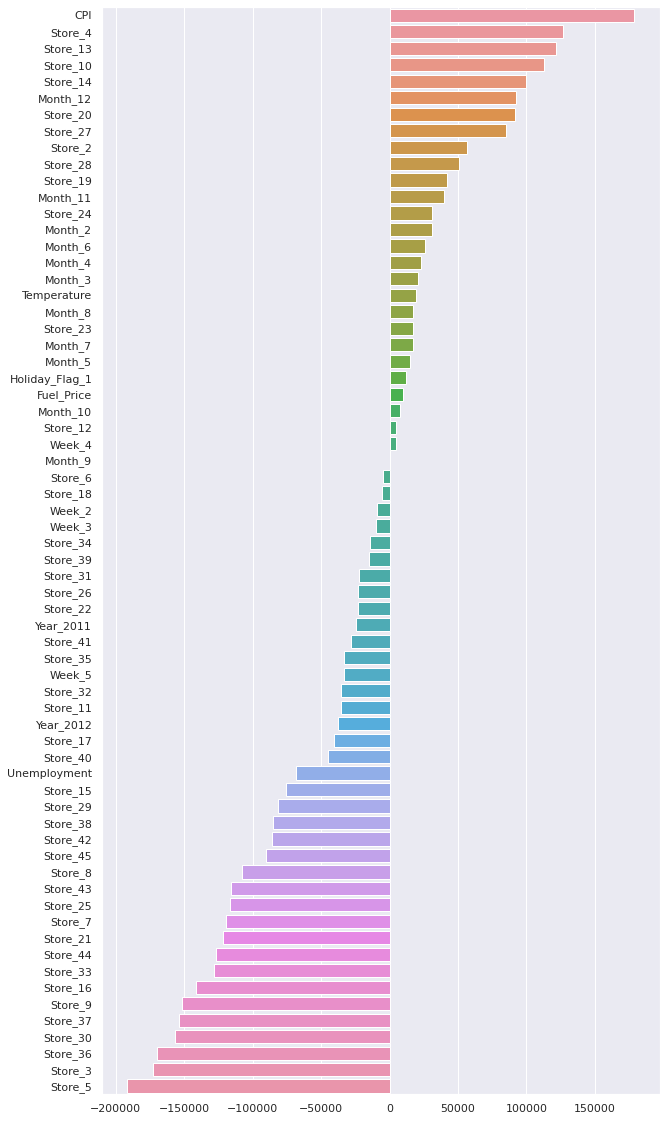

In [199]:
fig, ax = plt.subplots(figsize=(10, 20))
model = Ridge()
model.fit(X_train_scaled, y_train)

sorted_weights = sorted(zip(model.coef_, X_train.columns), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
sns.barplot(y=features, x=weights, ax=ax)
plt.show()

* Как и ожидалось, номер магазина играет большую роль, как и CPI, год 
* Номер месяца и недели слишком большую роль не играет, важны праздничные месяцы (декабрь, ноябрь)
* Возьмем признаки, у которых вес больше 25000

In [205]:
important_features = np.array(features)[np.abs(weights) > 25000]
print('Number of important features:', len(important_features))
important_features

Number of important features: 43


array(['CPI', 'Store_4', 'Store_13', 'Store_10', 'Store_14', 'Month_12',
 'Store_20', 'Store_27', 'Store_2', 'Store_28', 'Store_19',
 'Month_11', 'Store_24', 'Month_2', 'Month_6', 'Store_41',
 'Store_35', 'Week_5', 'Store_32', 'Store_11', 'Year_2012',
 'Store_17', 'Store_40', 'Unemployment', 'Store_15', 'Store_29',
 'Store_38', 'Store_42', 'Store_45', 'Store_8', 'Store_43',
 'Store_25', 'Store_7', 'Store_21', 'Store_44', 'Store_33',
 'Store_16', 'Store_9', 'Store_37', 'Store_30', 'Store_36',
 'Store_3', 'Store_5'], dtype='%lt;U14')

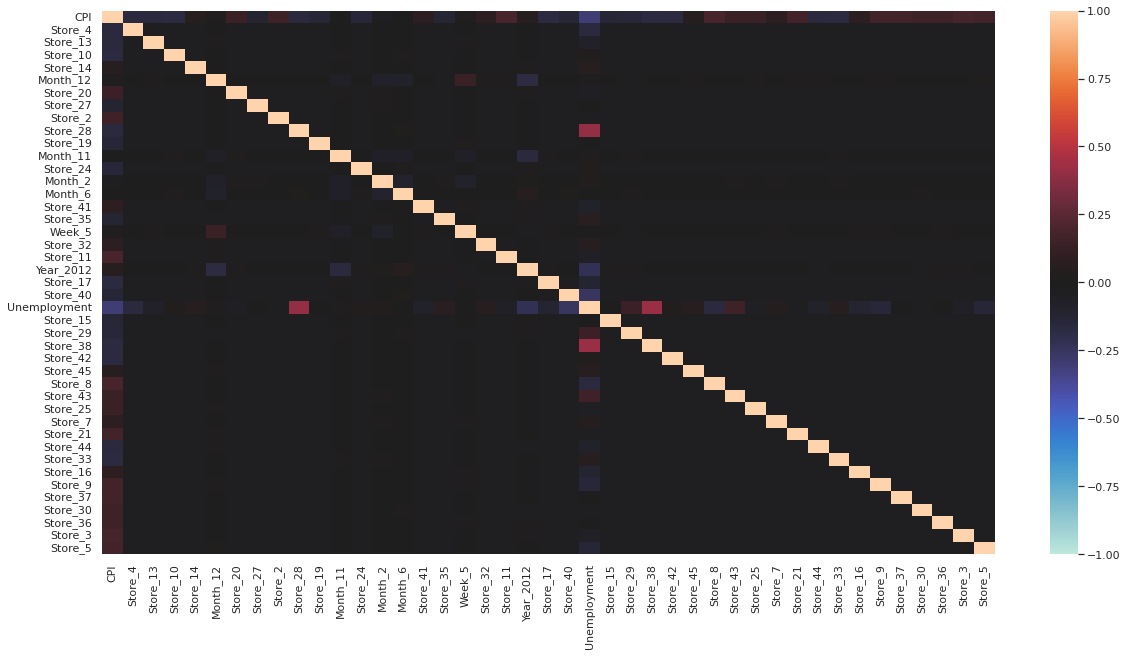

In [201]:
sns.heatmap(X_train[important_features].corr(), annot=False, vmin=-1, vmax=1, center=0);

В целом, сильных корреляций нет

Text(0, 0.5, 'CV score')

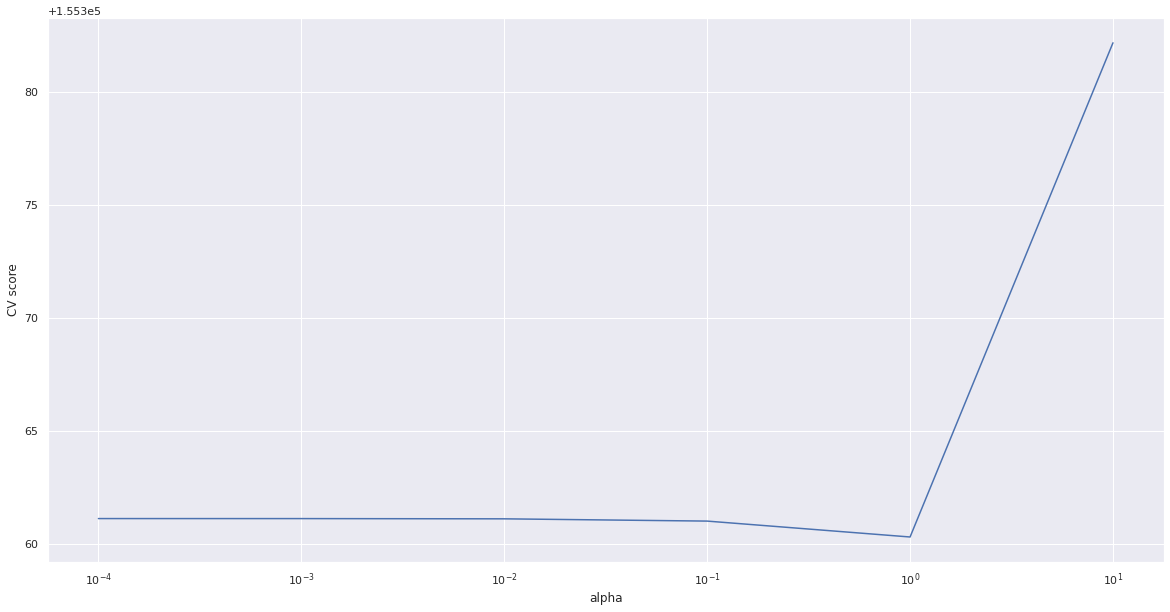

In [202]:
support_features = np.abs(model.coef_) > 25000
alpha_grid = np.logspace(-4, 1, 6)
searcher = GridSearchCV(
    Ridge(),
    [{"alpha": alpha_grid}],
    scoring="neg_root_mean_squared_error",
    cv=5
)
searcher.fit(X_train_scaled[:, support_features], y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [203]:
best_alpha = searcher.best_params_["alpha"]
print(f"Best alpha = {best_alpha:.4f}")

Best alpha = 1.0000


In [204]:
best_sklearn_model = Ridge(alpha=best_alpha)
best_sklearn_model.fit(X_train_scaled[:, support_features], y_train)
y_test_pred = best_sklearn_model.predict(X_test_scaled[:, support_features])

print('--- Best Sklearn model scores ---')
print(f"Model: alpha = {best_alpha}")
print(f"MSE: {mean_squared_error(y_test_pred, y_test)}")
print(f"RMSE: {mean_squared_error(y_test_pred, y_test, squared=False)}")
print(f"R^2: {r2_score(y_test_pred, y_test)}")

--- Best Sklearn model scores ---
Model: alpha = 1.0
MSE: 18266711738.610508
RMSE: 135154.39962728
R^2: 0.9394122362560445


Значения не сильно ухудшились, можно использовать только эти признаки :)


[✔️] Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.

[✔️] При обучении моделей использовать масштабирование данных.

[✔️] Обучить модель на обучающей выборке, используя функцию gradient_descent(X, y). Оценить качество модели на обучающей и тестовой выборках, используя MSE, RMSE и R^2.

[✔️] Обучить модель, используя существующую библиотеку. Например, в sklearn для L2-регуляризатора можно использовать Ridge. Сравнить качество с Вашей реализацией.

[✔️] Повторить тоже самое, но используя кросс-валидацию.

[✔️] Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.

[✔️] (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE) из sklearn.

[✔️] (+1 балл) Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.